In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

In [2]:
#Read daily data for Puma head office
filepath = "01_Data\\NeedEnergy Meter Data\\NeedEnergy API Data\\"
filename = "data_hourly_id_47740.csv"
df = pd.read_csv(filepath +  filename)
df['date']=df['date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5947 entries, 0 to 5946
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5947 non-null   datetime64[ns]
 1   timestamp         5947 non-null   int64         
 2   consumption       5947 non-null   float64       
 3   solar             5947 non-null   float64       
 4   alwaysOn          5947 non-null   float64       
 5   gridImport        5947 non-null   float64       
 6   gridExport        5947 non-null   float64       
 7   selfConsumption   5947 non-null   float64       
 8   selfSufficiency   5947 non-null   float64       
 9   active            5947 non-null   object        
 10  reactive          5947 non-null   object        
 11  voltages          5947 non-null   object        
 12  phaseVoltages     5947 non-null   object        
 13  currentHarmonics  5947 non-null   object        
 14  voltageHarmonics  5947 n

In [3]:
#Set timestamp as index
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2020-03-12 16:00:00', '2020-03-12 17:00:00',
               '2020-03-12 18:00:00', '2020-03-13 09:00:00',
               '2020-03-13 10:00:00', '2020-03-13 12:00:00',
               '2020-03-13 14:00:00', '2020-03-13 15:00:00',
               '2020-03-13 18:00:00', '2020-03-14 09:00:00',
               ...
               '2021-02-11 07:00:00', '2021-02-11 08:00:00',
               '2021-02-11 09:00:00', '2021-02-11 10:00:00',
               '2021-02-11 11:00:00', '2021-02-11 12:00:00',
               '2021-02-11 13:00:00', '2021-02-11 14:00:00',
               '2021-02-11 15:00:00', '2021-02-11 16:00:00'],
              dtype='datetime64[ns]', name='date', length=5947, freq=None)

In [4]:
#Get range
print(f"Startdate:\t{df.index.min()}")
print(f"Enddate:\t{df.index.max()}")

Startdate:	2020-03-12 16:00:00
Enddate:	2021-02-11 16:00:00


In [5]:
#Check for duplicates
df.index[df.index.duplicated(keep=False)==True]

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

--------------------------------------------------
##### Note:
- No duplicates
- Roughly ten months of data should make up at least 8.000 data entries, whereas we only have 5.947. <br>
- Lots of missing values presumed
--------------------------------------------------

In [6]:
#Create new series with all timestamps in the timeframe above and reseting DF Index to that series
date_rng = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(date_rng)
df.index

DatetimeIndex(['2020-03-12 16:00:00', '2020-03-12 17:00:00',
               '2020-03-12 18:00:00', '2020-03-12 19:00:00',
               '2020-03-12 20:00:00', '2020-03-12 21:00:00',
               '2020-03-12 22:00:00', '2020-03-12 23:00:00',
               '2020-03-13 00:00:00', '2020-03-13 01:00:00',
               ...
               '2021-02-11 07:00:00', '2021-02-11 08:00:00',
               '2021-02-11 09:00:00', '2021-02-11 10:00:00',
               '2021-02-11 11:00:00', '2021-02-11 12:00:00',
               '2021-02-11 13:00:00', '2021-02-11 14:00:00',
               '2021-02-11 15:00:00', '2021-02-11 16:00:00'],
              dtype='datetime64[ns]', length=8065, freq='H')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8065 entries, 2020-03-12 16:00:00 to 2021-02-11 16:00:00
Freq: H
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         5947 non-null   float64
 1   consumption       5947 non-null   float64
 2   solar             5947 non-null   float64
 3   alwaysOn          5947 non-null   float64
 4   gridImport        5947 non-null   float64
 5   gridExport        5947 non-null   float64
 6   selfConsumption   5947 non-null   float64
 7   selfSufficiency   5947 non-null   float64
 8   active            5947 non-null   object 
 9   reactive          5947 non-null   object 
 10  voltages          5947 non-null   object 
 11  phaseVoltages     5947 non-null   object 
 12  currentHarmonics  5947 non-null   object 
 13  voltageHarmonics  5947 non-null   object 
dtypes: float64(8), object(6)
memory usage: 945.1+ KB


In [8]:
#Keep only consumption column (and transform to kWh)
df=df.loc[:,['consumption']]/1000

In [9]:
#Insert date and timestamp column for merge with holiday data
df['date']=df.index.date.astype('datetime64[D]')
df['timestamp']=df.index.astype('datetime64[ns]')
df

,consumption,date,timestamp
2020-03-12 16:00:00,0.000000,2020-03-12,2020-03-12 16:00:00
2020-03-12 17:00:00,0.000000,2020-03-12,2020-03-12 17:00:00
2020-03-12 18:00:00,0.000000,2020-03-12,2020-03-12 18:00:00
2020-03-12 19:00:00,NaN,2020-03-12,2020-03-12 19:00:00
2020-03-12 20:00:00,NaN,2020-03-12,2020-03-12 20:00:00
...,...,...,...
2021-02-11 12:00:00,1.431727,2021-02-11,2021-02-11 12:00:00
2021-02-11 13:00:00,1.241046,2021-02-11,2021-02-11 13:00:00
2021-02-11 14:00:00,0.870535,2021-02-11,2021-02-11 14:00:00
2021-02-11 15:00:00,0.785309,2021-02-11,2021-02-11 15:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8065 entries, 2020-03-12 16:00:00 to 2021-02-11 16:00:00
Freq: H
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  5947 non-null   float64       
 1   date         8065 non-null   datetime64[ns]
 2   timestamp    8065 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 252.0 KB


In [11]:
# Have a look at missing values
print(f"{df.isnull().sum()}\n\n")
print(f"Percentage of missing values:\t{df['consumption'].isnull().sum()/len(df['consumption'])}")

consumption    2118
date              0
timestamp         0
dtype: int64


Percentage of missing values:	0.26261624302541847


## Merge public holidays and feature engineering for time series data

In [12]:
#Load public holiday dataset
filepath = "01_Data\\"
filename = "public_holidays_weekends_ZIM.xlsx"
df_hol = pd.read_excel(filepath +  filename)
df_hol['day']=df_hol['day'].astype('datetime64[ns]')
df_hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          2558 non-null   datetime64[ns]
 1   dayName      2558 non-null   object        
 2   dayOfWeek    2558 non-null   int64         
 3   weekend      2558 non-null   object        
 4   weekNumber   2558 non-null   int64         
 5   holiday      2558 non-null   object        
 6   holidayName  98 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 140.0+ KB


In [13]:
df_hol.rename(columns={'day':'date'}, inplace=True)
df_hol

,date,dayName,dayOfWeek,weekend,weekNumber,holiday,holidayName
0,2018-01-01,Monday,0,N,1,Y,New Year's Day
1,2018-01-02,Tuesday,1,N,1,N,NaN
2,2018-01-03,Wednesday,2,N,1,N,NaN
3,2018-01-04,Thursday,3,N,1,N,NaN
4,2018-01-05,Friday,4,N,1,N,NaN
...,...,...,...,...,...,...,...
2553,2024-12-28,Saturday,5,Y,52,N,NaN
2554,2024-12-29,Sunday,6,Y,52,N,NaN
2555,2024-12-30,Monday,0,N,53,N,NaN
2556,2024-12-31,Tuesday,1,N,53,N,NaN


In [14]:
#Merge and reset timestamp as index
df = df.merge(df_hol, how='left', on='date')
df.set_index('timestamp', inplace=True)
df

,consumption,date,dayName,dayOfWeek,weekend,weekNumber,holiday,holidayName
timestamp,,,,,,,,
2020-03-12 16:00:00,0.000000,2020-03-12,Thursday,3,N,11,N,NaN
2020-03-12 17:00:00,0.000000,2020-03-12,Thursday,3,N,11,N,NaN
2020-03-12 18:00:00,0.000000,2020-03-12,Thursday,3,N,11,N,NaN
2020-03-12 19:00:00,NaN,2020-03-12,Thursday,3,N,11,N,NaN
2020-03-12 20:00:00,NaN,2020-03-12,Thursday,3,N,11,N,NaN
...,...,...,...,...,...,...,...,...
2021-02-11 12:00:00,1.431727,2021-02-11,Thursday,3,N,7,N,NaN
2021-02-11 13:00:00,1.241046,2021-02-11,Thursday,3,N,7,N,NaN
2021-02-11 14:00:00,0.870535,2021-02-11,Thursday,3,N,7,N,NaN


In [15]:
df.isnull().sum()

consumption    2118
date              0
dayName           0
dayOfWeek         0
weekend           0
weekNumber        0
holiday           0
holidayName    7753
dtype: int64

In [16]:
df['working day']=0
df
df.loc[((df['weekend']=='N')&(df['holiday']=='N')),'working day']=1
df

,consumption,date,dayName,dayOfWeek,weekend,weekNumber,holiday,holidayName,working day
timestamp,,,,,,,,,
2020-03-12 16:00:00,0.000000,2020-03-12,Thursday,3,N,11,N,NaN,1
2020-03-12 17:00:00,0.000000,2020-03-12,Thursday,3,N,11,N,NaN,1
2020-03-12 18:00:00,0.000000,2020-03-12,Thursday,3,N,11,N,NaN,1
2020-03-12 19:00:00,NaN,2020-03-12,Thursday,3,N,11,N,NaN,1
2020-03-12 20:00:00,NaN,2020-03-12,Thursday,3,N,11,N,NaN,1
...,...,...,...,...,...,...,...,...,...
2021-02-11 12:00:00,1.431727,2021-02-11,Thursday,3,N,7,N,NaN,1
2021-02-11 13:00:00,1.241046,2021-02-11,Thursday,3,N,7,N,NaN,1
2021-02-11 14:00:00,0.870535,2021-02-11,Thursday,3,N,7,N,NaN,1


In [17]:
#Add time series features
df.insert(1, 'hour', df.index.hour)
df.insert(1, 'day', df.index.day)
df.insert(1, 'month', df.index.month)
df.insert(1,'year',df.index.year)

In [18]:
#Convert weekend and holiday to numbers
df['weekend'].replace({'N':0,'Y':1}, inplace=True)
df['holiday'].replace({'N':0,'Y':1}, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8065 entries, 2020-03-12 16:00:00 to 2021-02-11 16:00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  5947 non-null   float64       
 1   year         8065 non-null   int64         
 2   month        8065 non-null   int64         
 3   day          8065 non-null   int64         
 4   hour         8065 non-null   int64         
 5   date         8065 non-null   datetime64[ns]
 6   dayName      8065 non-null   object        
 7   dayOfWeek    8065 non-null   int64         
 8   weekend      8065 non-null   int64         
 9   weekNumber   8065 non-null   int64         
 10  holiday      8065 non-null   int64         
 11  holidayName  312 non-null    object        
 12  working day  8065 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(2)
memory usage: 882.1+ KB


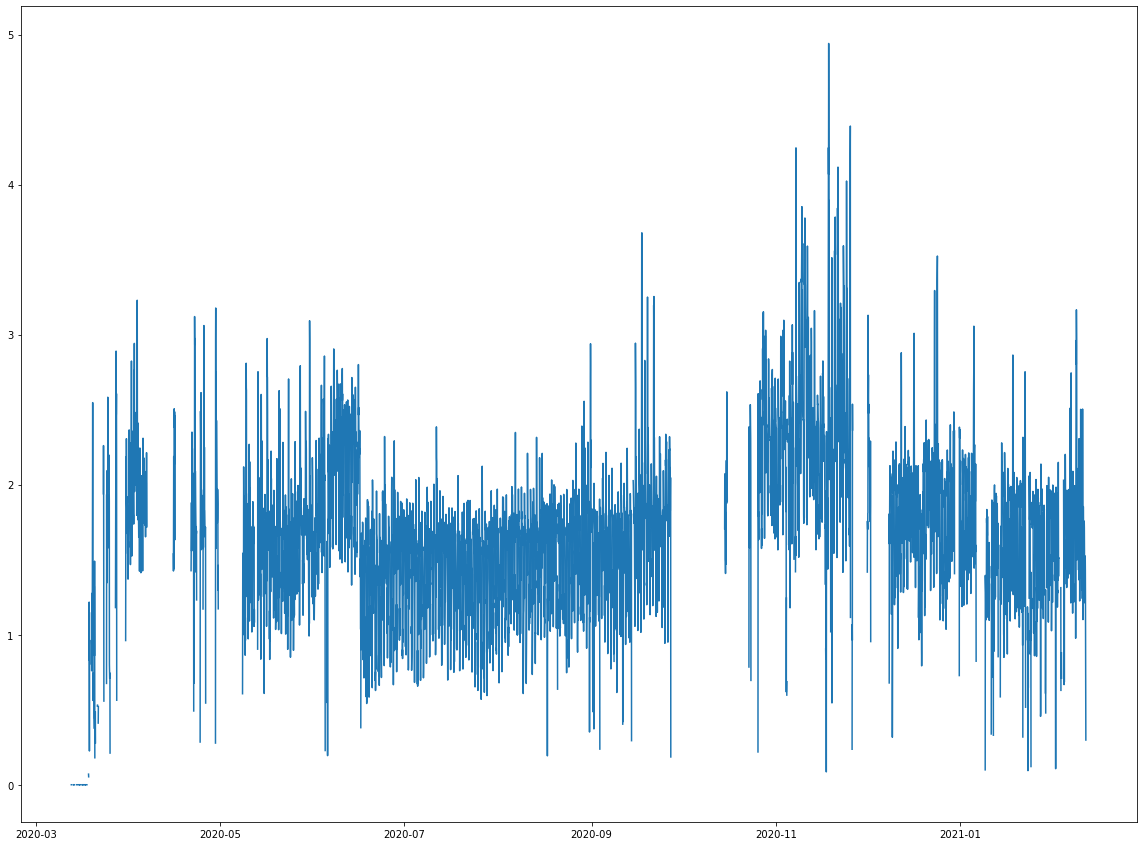

In [20]:
plt.figure(figsize=(20,15))
plt.plot(df.loc[:,'consumption']);

--------------------------------------------------
##### Note:
First plot to get a feel for missing values. <br>
It seems that mostly multiple days in a row are missing. <br>
Digging deeper into different months with heatmaps
--------------------------------------------------

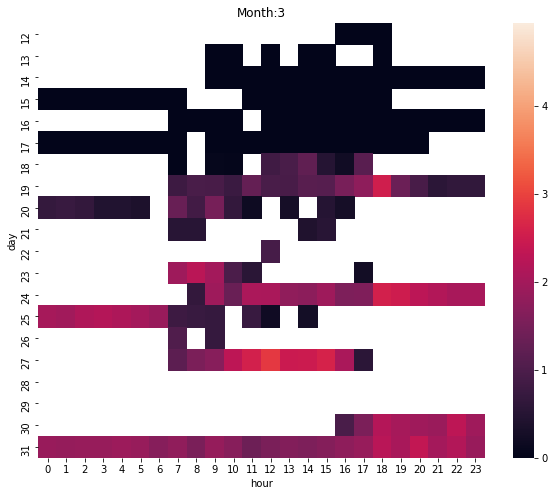

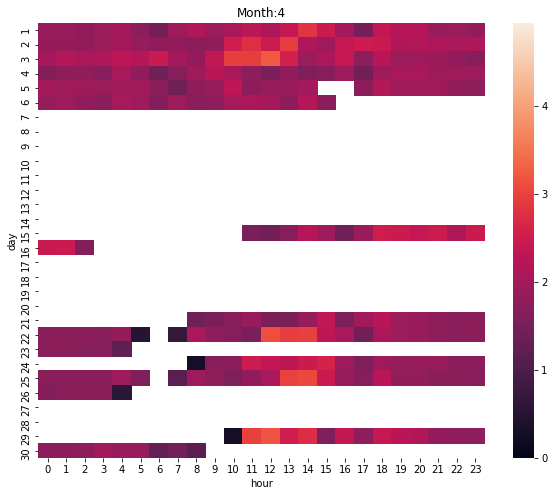

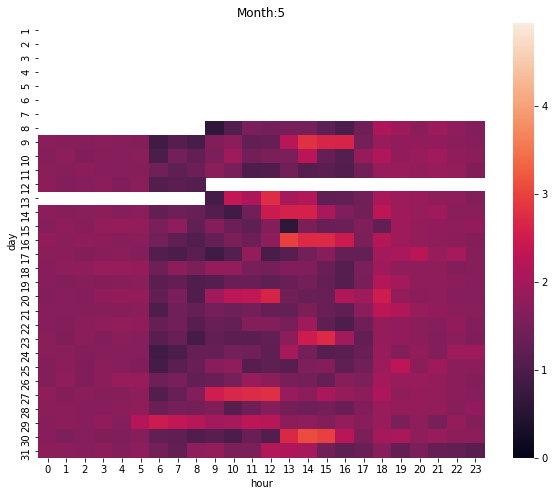

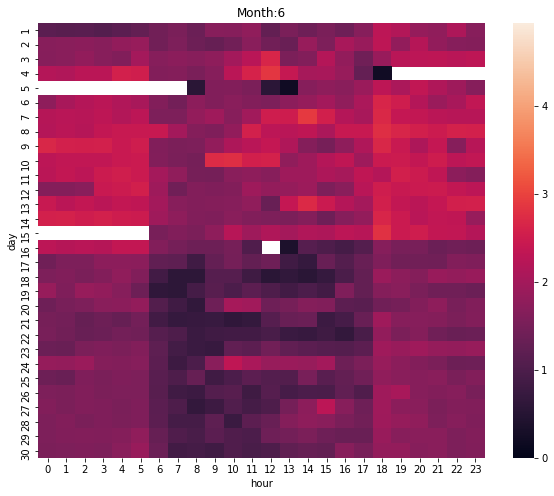

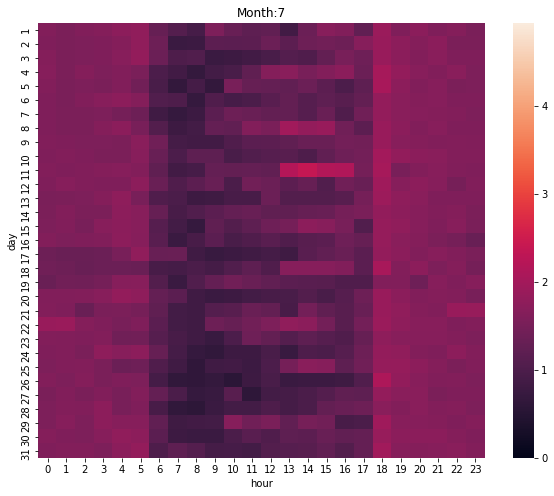

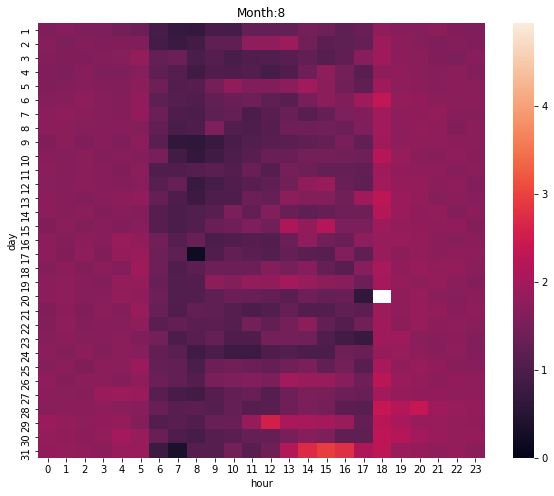

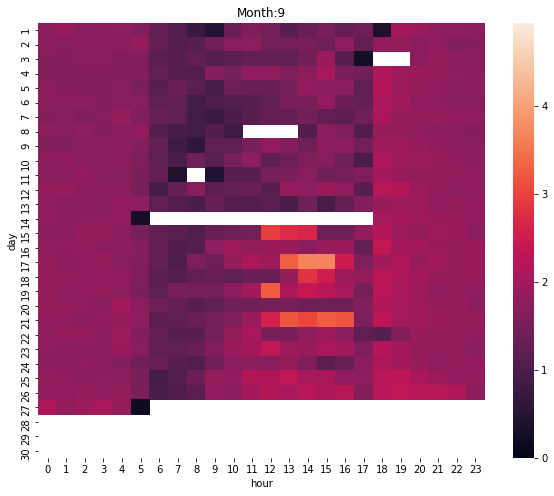

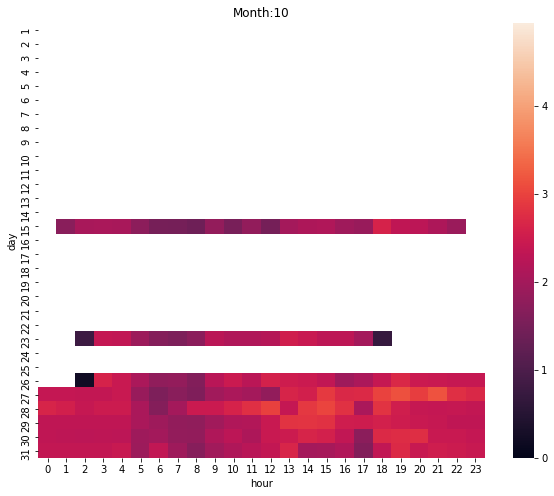

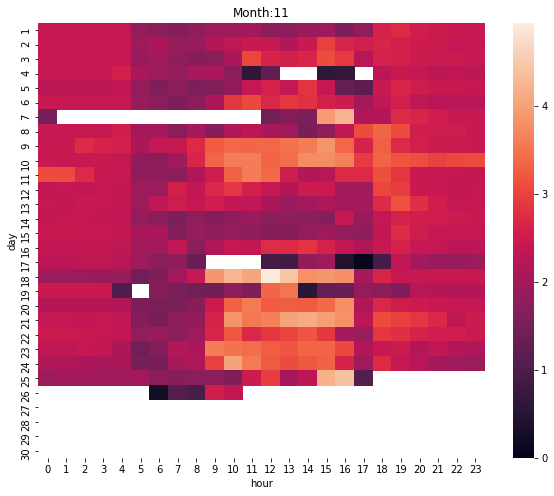

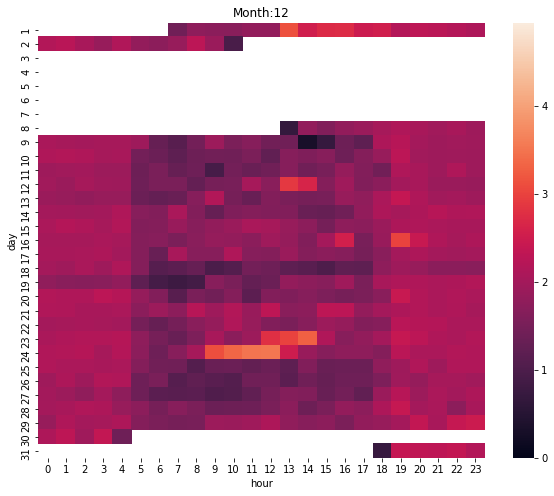

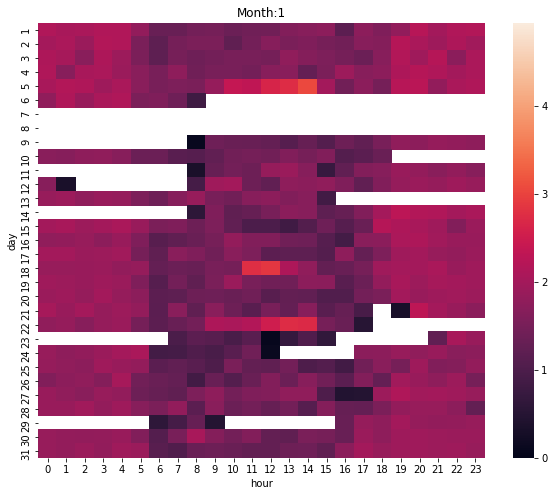

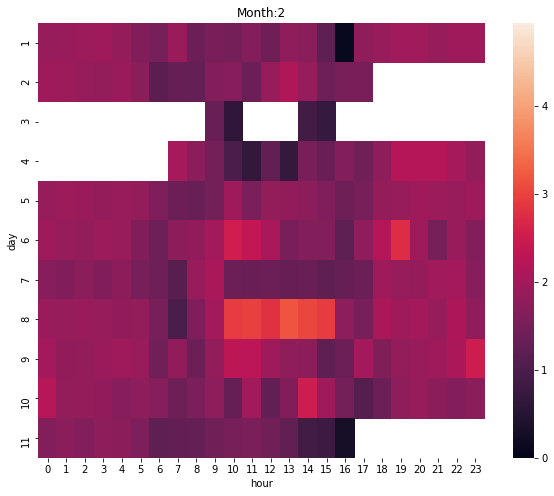

In [21]:
for month in df['month'].unique():
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set(title = (f"Month:{month}"))
    df_tmp = df.loc[df['month']==month, :].pivot(index='day', columns='hour', values='consumption')
    sns.heatmap(df_tmp, vmin=df['consumption'].min(), vmax=df['consumption'].max());
    del df_tmp

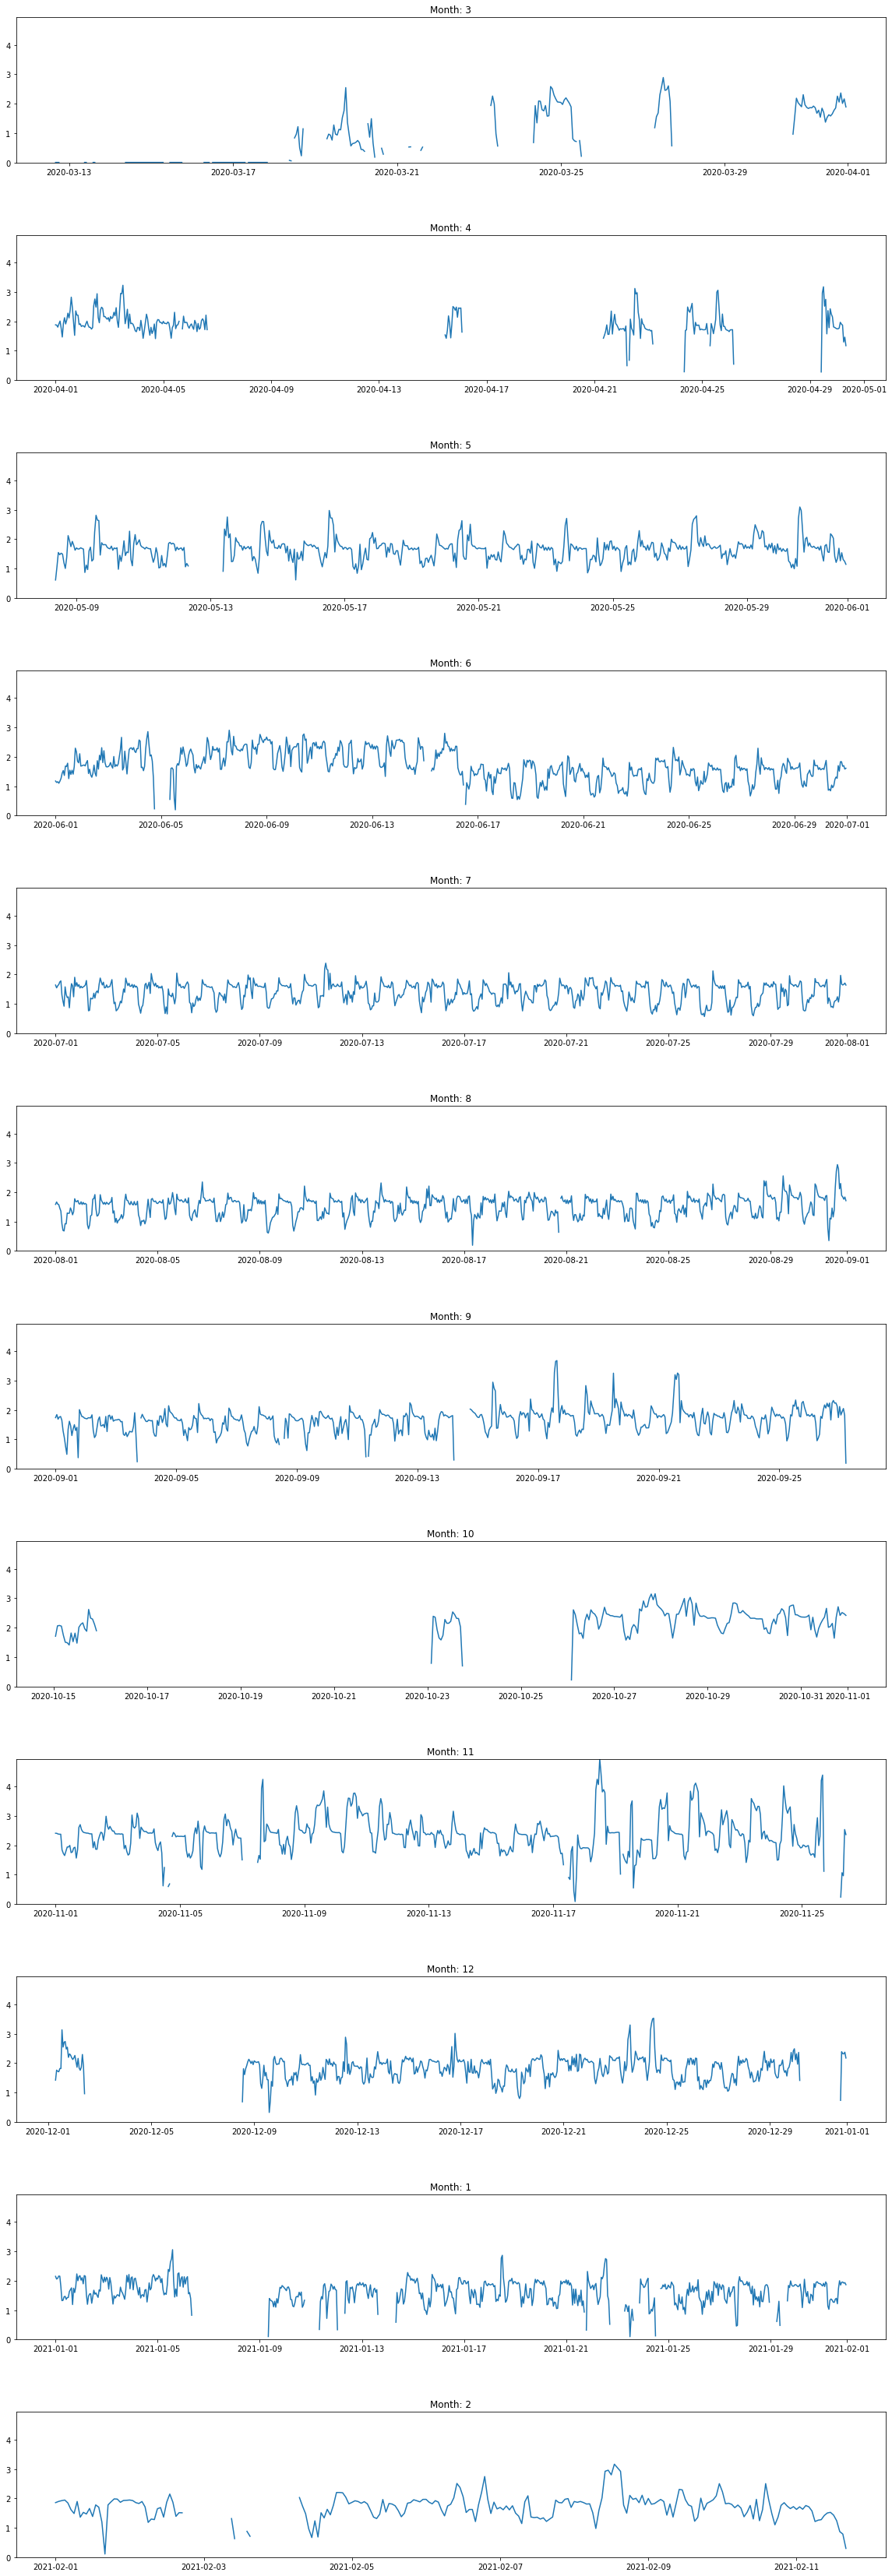

In [22]:
fig, ax = plt.subplots(12,1, figsize=(20,60))
fig.subplots_adjust(hspace=0.5)
for i, month in enumerate(df['month'].unique()):
    ax[i].set(ylim=(df['consumption'].min(),df['consumption'].max()), 
              title=f"Month: {month}")
    ax[i].plot(df.loc[df['month']==month, 'consumption'], label="month");

In [23]:
#Missing values for March and April
mv = df['2020-03':'2020-04']['consumption'].isnull().sum()
#Null values for March and April
nv = len(df['2020-03':'2020-04'].loc[df['consumption']==0, 'consumption'])
# Base
base= len(df['2020-03':'2020-04']['consumption'])
print(f"Percentage of missing values in March and April:\t{(mv+nv)/base}")

Percentage of missing values in March and April:	0.674831081081081


##### Notes:
- March and April most likely need to be dropped, because of too many missing values and no reasonable way to impute them
- everything else can be imputed by using an average profile
- additional challenge: OCTOBER (also has lots of missing values)
##### possible solution: impute first half with September values and second half with November values?

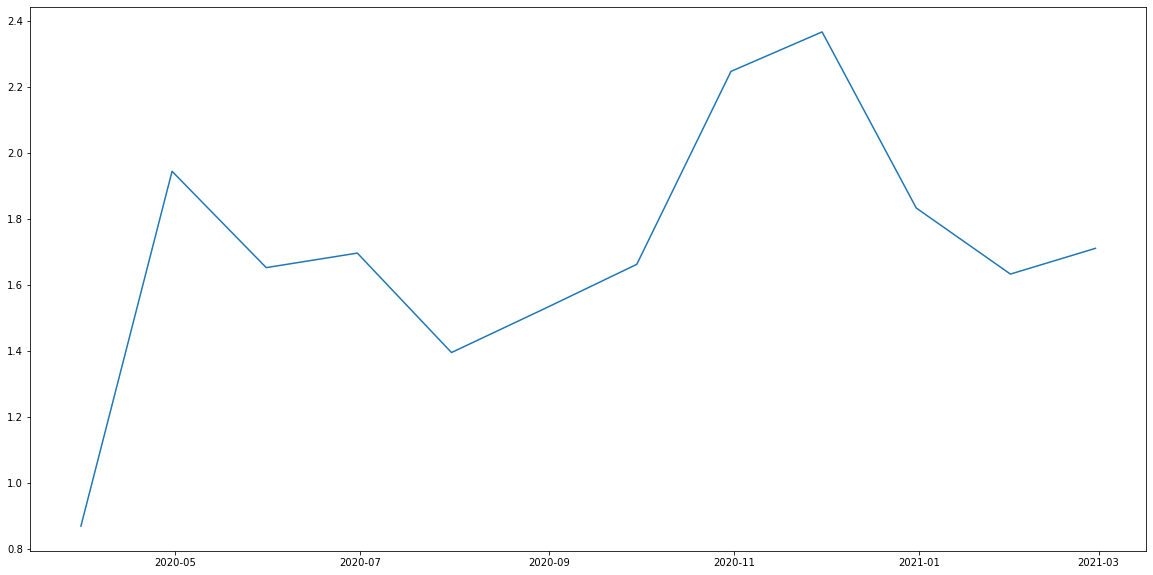

In [24]:
# Look as seasonality of every month
df_month=df.resample('M')['consumption'].mean()
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_month)

##### Notes:
- high variance in monthly energy consumption --> how to impute values in order to represent that seasonality?

In [25]:
df_tmp=df.groupby(['month','hour']).agg({'consumption':'median'}).reset_index()
#df_tmp['hour']=df_tmp['time'].dt.hour
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        288 non-null    int64  
 1   hour         288 non-null    int64  
 2   consumption  288 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.9 KB


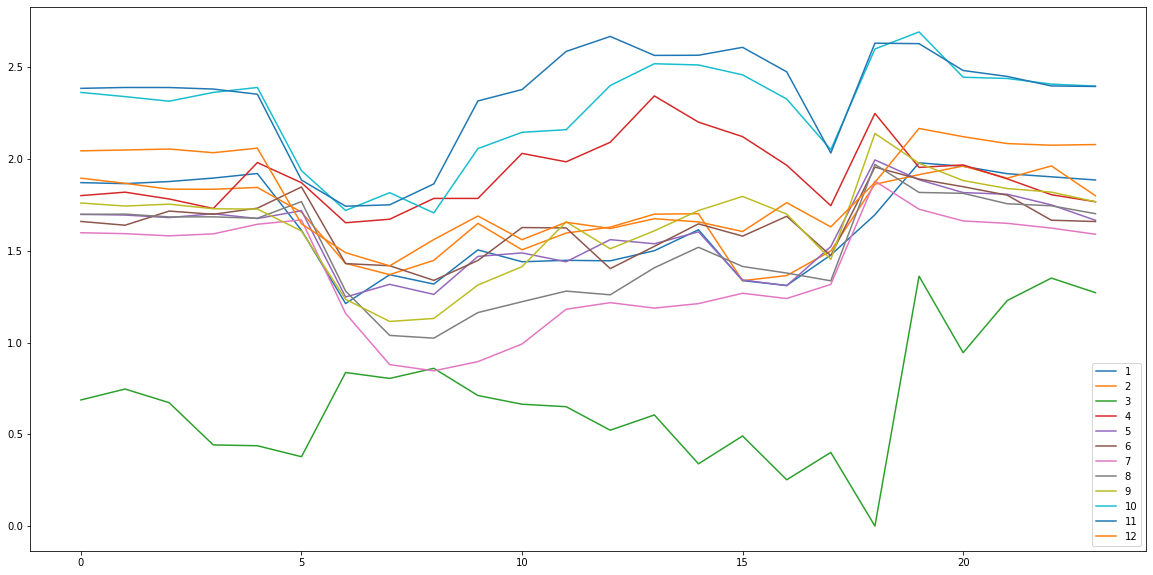

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
for month in df_tmp['month'].unique():
    #print(df_tmp.loc[df_tmp['month']==month,'consumption'])
    plt.plot(df_tmp.loc[df_tmp['month']==month,'hour'], df_tmp.loc[df_tmp['month']==month,'consumption'], label=month)
    ax.legend(loc="best")

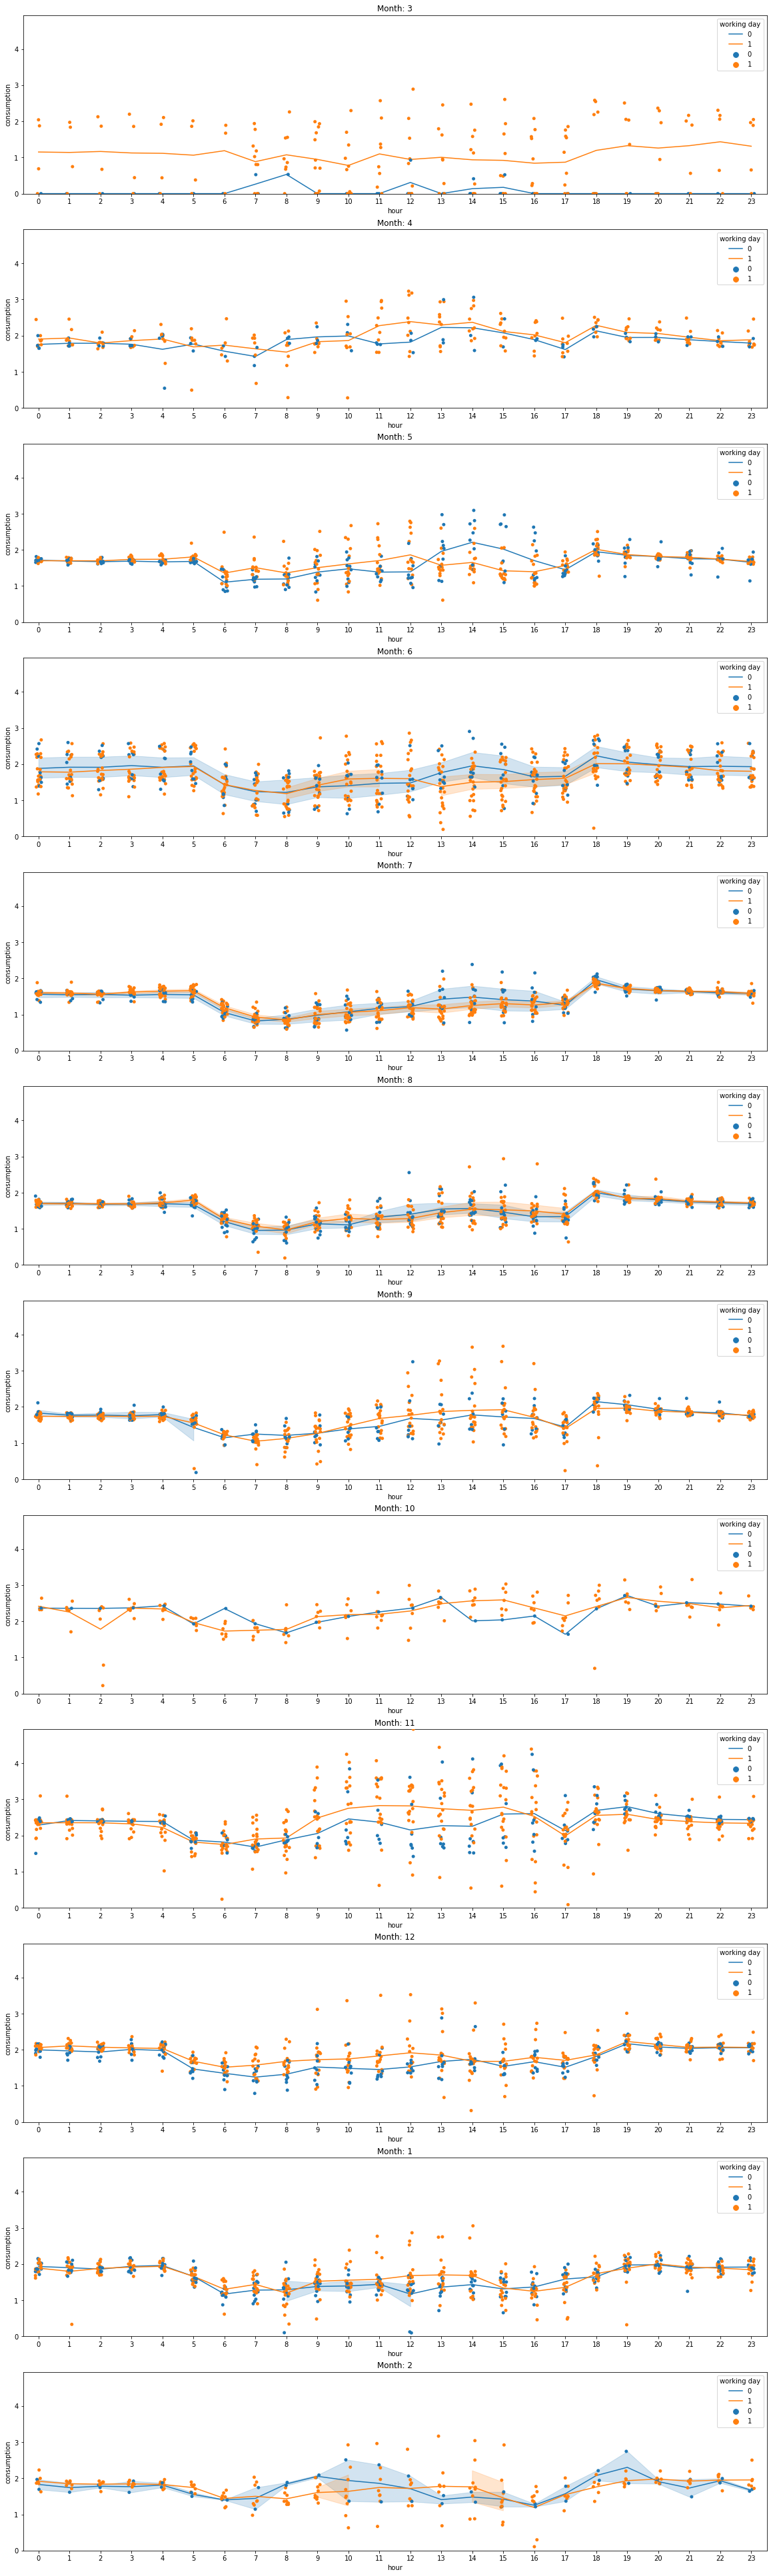

In [27]:
# Plot daily consumption profile for every month 
#(lineplot for median and stripplot to look at distribution of values for every hour)
fig, axs = plt.subplots(12,1, figsize=(20,70))
for i, month in enumerate(df.index.month.unique()):
    axs[i].set(ylim=(df['consumption'].min(),df['consumption'].max()),
               title = f"Month: {month}")
    sns.lineplot(x='hour', y='consumption', data=df.loc[(df.index.month==month),:], ax=axs[i], hue="working day")
    sns.stripplot(x='hour', y='consumption', data=df.loc[df.index.month==month,:], ax=axs[i], hue="working day")

In [28]:
# Calculate mean and Standarddeviaton for a given month (in this case September)
df.groupby(['month', 'hour']).agg({'consumption':['mean','std']}).loc[[9],:]

consumption          
                  mean       std
month hour                      
9     0       1.766953  0.098885
      1       1.747688  0.068110
      2       1.753270  0.072479
      3       1.742426  0.089401
      4       1.757391  0.091505
      5       1.521612  0.381158
      6       1.206200  0.116803
      7       1.105796  0.201094
      8       1.152768  0.254807
      9       1.267326  0.360919
      10      1.451961  0.313914
      11      1.616884  0.347704
      12      1.742781  0.571707
      13      1.804613  0.585755
      14      1.870854  0.613494
      15      1.867474  0.605583
      16      1.701761  0.457651
      17      1.413094  0.338255
      18      2.010697  0.420194
      19      1.992872  0.146151
      20      1.895125  0.110276
      21      1.857450  0.099356
      22      1.811330  0.093160
      23      1.763866  0.070051

In [29]:
# Calculate mean and Standarddeviaton for a given month (in this case September)
df.groupby(['month', 'hour']).agg({'consumption':['mean','std']}).loc[[11],:]

consumption          
                  mean       std
month hour                      
11    0       2.331545  0.270748
      1       2.368946  0.206828
      2       2.364409  0.178416
      3       2.338226  0.156555
      4       2.263416  0.315941
      5       1.831379  0.198955
      6       1.764835  0.393831
      7       1.847557  0.343318
      8       1.918923  0.402583
      9       2.377211  0.666909
      10      2.679538  0.821465
      11      2.707601  0.825454
      12      2.631503  0.899554
      13      2.603416  0.857429
      14      2.566896  0.875878
      15      2.730420  0.945546
      16      2.550101  1.055376
      17      2.030370  0.615181
      18      2.595922  0.529151
      19      2.648341  0.326828
      20      2.487625  0.222060
      21      2.423582  0.210066
      22      2.376050  0.213786
      23      2.366243  0.217107

##### Notes: large standard deviation for September and October --> does not make sense to take rolling average for October
### Conclusion: only take month 05-09 and inpute with average daily profile (>4hours missing) or forward fill

## Cleaning of data

In [30]:
#Create sliced dataframe for wrangling
df_wrangled=df['2020-05':'2020-09'].copy()
#Get months
months=np.unique(np.array(df_wrangled.index).astype('datetime64[M]'))
months

array(['2020-05', '2020-06', '2020-07', '2020-08', '2020-09'],
      dtype='datetime64[M]')

In [31]:
#Get days with zero consumption in 24 hours from May to September
missing_days=df['2020-05':'2020-09']['consumption'].isnull()
md=missing_days.loc[missing_days==True].resample('D').count()==24
md.loc[md==True]

timestamp
2020-05-01    True
2020-05-02    True
2020-05-03    True
2020-05-04    True
2020-05-05    True
2020-05-06    True
2020-05-07    True
2020-09-28    True
2020-09-29    True
2020-09-30    True
Name: consumption, dtype: bool

In [32]:
#Check which days in may are working days
df['2020-05-01':'2020-05-13'].groupby('day').agg({'working day':'unique'})

,working day
day,
1,[0]
2,[0]
3,[0]
4,[1]
5,[1]
6,[1]
7,[1]
8,[1]
9,[0]


In [33]:
#Create daily profiles
df_profiles=df_wrangled.groupby(['month','working day', 'hour']).agg({'consumption':['mean', 'min', 'max', 'std']}).droplevel(level=0, axis=1)

##### May

In [34]:
# Replace working and non-working days in May
nwdays = ['2020-05-01', '2020-05-02', '2020-05-03']
wdays = ['2020-05-04','2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-12', '2020-05-13']

for day in nwdays:
    df_wrangled.loc[day, 'consumption']=np.asarray(df_profiles.loc[(5,0),'mean'])

for day in wdays:
    df_wrangled.loc[day, 'consumption']=np.asarray(df_profiles.loc[(5,1),'mean'])

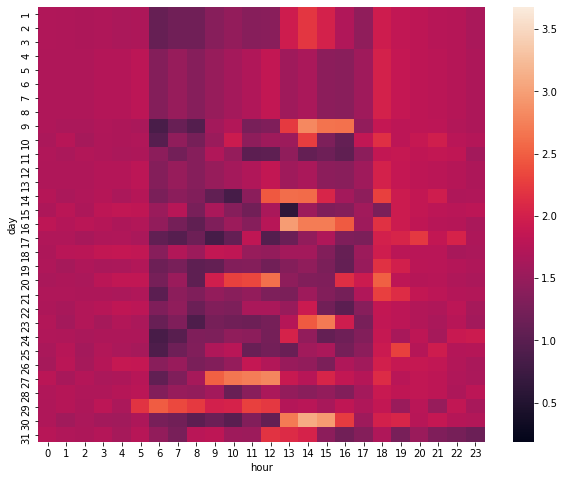

In [35]:
#Check May
fig, ax = plt.subplots(figsize=(10,8))
df_tmp = df_wrangled.loc[df['month']==5, :].pivot(index='day', columns='hour', values='consumption')
sns.heatmap(df_tmp, vmin=df_wrangled['consumption'].min(), vmax=df_wrangled['consumption'].max());

##### June

In [36]:
#Check which days in June are working days
df['2020-06-04':'2020-06-15'].groupby('day').agg({'working day':'unique'})

,working day
day,
4,[1]
5,[1]
6,[0]
7,[0]
8,[1]
9,[1]
10,[1]
11,[1]
12,[1]


In [37]:
# Replace working and non-working days in June
wdays = ['2020-06-04', '2020-06-05', '2020-06-15']

for day in wdays:
    df_wrangled.loc[day, 'consumption']=np.asarray(df_profiles.loc[(6,1),'mean'])

In [38]:
# Fill other with ffwill
df_wrangled['2020-06']['consumption'].fillna(method='ffill', axis=0, inplace=True)

D:\Programme\01_Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


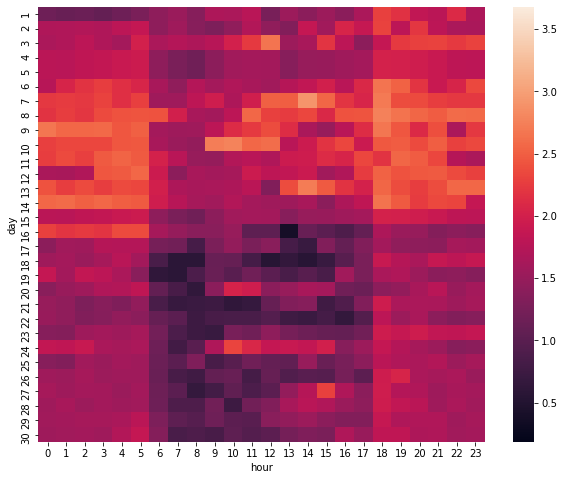

In [39]:
#Check June
fig, ax = plt.subplots(figsize=(10,8))
df_tmp = df_wrangled.loc[df_wrangled['month']==6, :].pivot(index='day', columns='hour', values='consumption')
sns.heatmap(df_tmp, vmin=df_wrangled['consumption'].min(), vmax=df_wrangled['consumption'].max());

##### August

In [40]:
# Fill other with ffwill
df_wrangled['2020-08']['consumption'].fillna(method='ffill', axis=0, inplace=True)

D:\Programme\01_Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


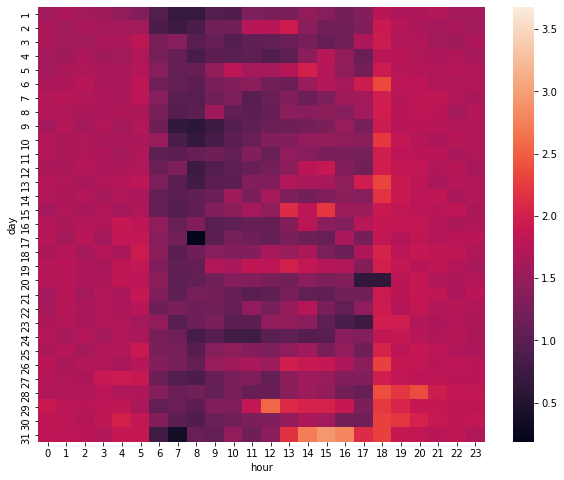

In [41]:
#Check August
fig, ax = plt.subplots(figsize=(10,8))
df_tmp = df_wrangled.loc[df_wrangled['month']==8, :].pivot(index='day', columns='hour', values='consumption')
sns.heatmap(df_tmp, vmin=df_wrangled['consumption'].min(), vmax=df_wrangled['consumption'].max());

##### September

In [42]:
#Check which days in September are working days
df['2020-09-14':'2020-09-30'].groupby('day').agg({'working day':'unique'})
#14,27,28,29,30

,working day
day,
14,[1]
15,[1]
16,[1]
17,[1]
18,[1]
19,[0]
20,[0]
21,[1]
22,[1]


In [43]:
# Replace working and non-working days in September
nwdays = ['2020-09-27']
wdays = ['2020-09-14', '2020-09-28', '2020-09-29', '2020-09-30']

for day in nwdays:
    df_wrangled.loc[day, 'consumption']=np.asarray(df_profiles.loc[(9,0),'mean'])

for day in wdays:
    df_wrangled.loc[day, 'consumption']=np.asarray(df_profiles.loc[(9,1),'mean'])

In [44]:
# Fill other with ffwill
df_wrangled['2020-09']['consumption'].fillna(method='ffill', axis=0, inplace=True)

D:\Programme\01_Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


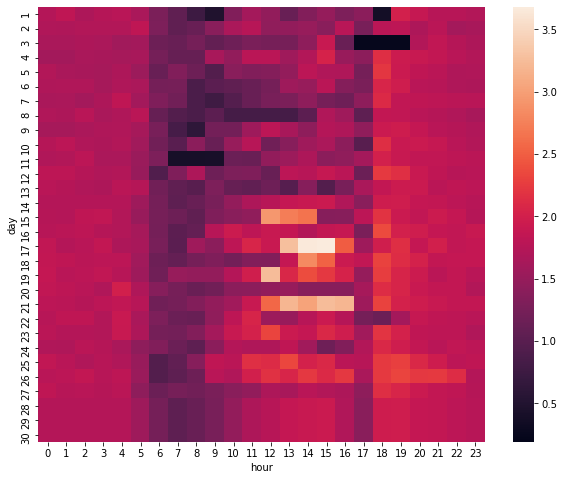

In [45]:
#Check September
fig, ax = plt.subplots(figsize=(10,8))
df_tmp = df_wrangled.loc[df_wrangled['month']==9, :].pivot(index='day', columns='hour', values='consumption')
sns.heatmap(df_tmp, vmin=df_wrangled['consumption'].min(), vmax=df_wrangled['consumption'].max());

In [46]:
df_wrangled.isnull().sum()

consumption       0
year              0
month             0
day               0
hour              0
date              0
dayName           0
dayOfWeek         0
weekend           0
weekNumber        0
holiday           0
holidayName    3576
working day       0
dtype: int64

## Merge other datasets: weather data (copied from JMcQ/NW Notebook

In [47]:
filepath = "01_Data\\Solar Irradiance and Meteorological Data\\"
filename = "Harare_Hourly_Weather_2005-2021.csv"
weather_df = pd.read_csv(filepath +  filename)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141827 entries, 0 to 141826
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   141827 non-null  int64  
 1   dt_iso               141827 non-null  object 
 2   timezone             141827 non-null  int64  
 3   city_name            141827 non-null  object 
 4   lat                  141827 non-null  float64
 5   lon                  141827 non-null  float64
 6   temp                 141827 non-null  float64
 7   feels_like           141827 non-null  float64
 8   temp_min             141827 non-null  float64
 9   temp_max             141827 non-null  float64
 10  pressure             141827 non-null  int64  
 11  sea_level            0 non-null       float64
 12  grnd_level           0 non-null       float64
 13  humidity             141827 non-null  int64  
 14  wind_speed           141827 non-null  float64
 15  wind_deg         

In [48]:
weather_df = weather_df[['dt_iso', 'temp', 'humidity', 'clouds_all']]
weather_df.rename(columns={'dt_iso':'datetime'},inplace=True)
weather_df.head()

,datetime,temp,humidity,clouds_all
0,2005-01-01 00:00:00 +0000 UTC,17.07,91,96
1,2005-01-01 01:00:00 +0000 UTC,16.85,93,0
2,2005-01-01 02:00:00 +0000 UTC,16.70,93,0
3,2005-01-01 03:00:00 +0000 UTC,17.23,92,75
4,2005-01-01 04:00:00 +0000 UTC,17.57,88,75


In [49]:
weather_df['datetime'] = weather_df['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S %z %Z').strftime('%Y-%m-%d %H:%M:%S'))
weather_df.head()

,datetime,temp,humidity,clouds_all
0,2005-01-01 00:00:00,17.07,91,96
1,2005-01-01 01:00:00,16.85,93,0
2,2005-01-01 02:00:00,16.70,93,0
3,2005-01-01 03:00:00,17.23,92,75
4,2005-01-01 04:00:00,17.57,88,75


In [50]:
# Slice datarame for 2020 onwards
weather_df = weather_df.loc[pd.to_datetime(weather_df['datetime']).dt.year >= 2020]
weather_df

,datetime,temp,humidity,clouds_all
132059,2020-01-01 00:00:00,20.11,71,94
132060,2020-01-01 01:00:00,20.05,72,92
132061,2020-01-01 02:00:00,19.76,73,94
132062,2020-01-01 03:00:00,22.10,67,96
132063,2020-01-01 04:00:00,21.34,72,0
...,...,...,...,...
141822,2021-02-10 19:00:00,19.45,85,0
141823,2021-02-10 20:00:00,18.45,88,77
141824,2021-02-10 21:00:00,19.19,86,77
141825,2021-02-10 22:00:00,18.85,86,77


In [51]:
# Check there are no missing rows/hours
weather_start = weather_df['datetime'].min()
weather_end = weather_df['datetime'].max()
weather_full_index = pd.date_range(weather_start, weather_end, freq='H')
len(weather_full_index) == len(weather_df)

True

In [52]:
weather_df.set_index('datetime', inplace = True)
weather_df = weather_df.reindex(weather_full_index)
weather_df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2021-02-10 14:00:00', '2021-02-10 15:00:00',
               '2021-02-10 16:00:00', '2021-02-10 17:00:00',
               '2021-02-10 18:00:00', '2021-02-10 19:00:00',
               '2021-02-10 20:00:00', '2021-02-10 21:00:00',
               '2021-02-10 22:00:00', '2021-02-10 23:00:00'],
              dtype='datetime64[ns]', length=9768, freq='H')

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
weather_features = weather_df.select_dtypes(include=numerics).columns 
for feature in weather_features:
    weather_df[feature] = weather_df[feature].replace(0,np.nan)
    weather_df[feature] = weather_df[feature].fillna(method = 'bfill')   
weather_df.reset_index(inplace = True)
weather_df.rename(columns = {'index':'datetime'}, inplace = True)
weather_df.head()

,datetime,temp,humidity,clouds_all
0,2020-01-01 00:00:00,20.11,71,94.0
1,2020-01-01 01:00:00,20.05,72,92.0
2,2020-01-01 02:00:00,19.76,73,94.0
3,2020-01-01 03:00:00,22.10,67,96.0
4,2020-01-01 04:00:00,21.34,72,75.0


In [54]:
# Use simple forward fill to replace negative cloud cover values
weather_df['clouds_all']=weather_df['clouds_all'].mask(weather_df['clouds_all']<0).ffill(downcast='infer')

In [55]:
# JMcQ
# Rename and divide by 100 to make it more ML friendly
weather_df['clouds_all'] = weather_df['clouds_all']/100
weather_df.rename(columns={'clouds_all':'cloud_cover'}, inplace=True)
# Temperature in degrees C, rename with units
weather_df.rename(columns={'temp':'temp_degreeC'}, inplace=True)
# Humidity is relative humidity as a %
# Rename and divide by 100 to make it more ML friendly
weather_df['humidity'] = weather_df['humidity']/100
weather_df.rename(columns={'humidity':'rel_humidity'}, inplace=True)

In [56]:
weather_df.set_index('datetime', inplace=True)

In [57]:
df_wrangled=df_wrangled.merge(weather_df, left_index=True, right_index=True)

In [58]:
df_wrangled

,consumption,year,month,day,hour,date,dayName,dayOfWeek,weekend,weekNumber,holiday,holidayName,working day,temp_degreeC,rel_humidity,cloud_cover
2020-05-01 00:00:00,1.713228,2020,5,1,0,2020-05-01,Friday,4,0,18,1,Worker's Day,0,12.95,1.00,0.01
2020-05-01 01:00:00,1.691028,2020,5,1,1,2020-05-01,Friday,4,0,18,1,Worker's Day,0,14.95,0.76,0.01
2020-05-01 02:00:00,1.673063,2020,5,1,2,2020-05-01,Friday,4,0,18,1,Worker's Day,0,14.77,0.76,0.01
2020-05-01 03:00:00,1.687631,2020,5,1,3,2020-05-01,Friday,4,0,18,1,Worker's Day,0,14.50,0.82,0.01
2020-05-01 04:00:00,1.667127,2020,5,1,4,2020-05-01,Friday,4,0,18,1,Worker's Day,0,13.66,0.87,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,1.966458,2020,9,30,19,2020-09-30,Wednesday,2,0,40,0,NaN,1,21.69,0.65,0.04
2020-09-30 20:00:00,1.880579,2020,9,30,20,2020-09-30,Wednesday,2,0,40,0,NaN,1,20.60,0.69,0.05
2020-09-30 21:00:00,1.854187,2020,9,30,21,2020-09-30,Wednesday,2,0,40,0,NaN,1,18.99,0.73,0.02
2020-09-30 22:00:00,1.802421,2020,9,30,22,2020-09-30,Wednesday,2,0,40,0,NaN,1,18.15,0.74,0.02


In [59]:
#df_wrangled['holidayName'].replace({np.nan:''},inplace=True)
df_wrangled['holidayName'].replace({'':'0'},inplace=True)

In [60]:
df_wrangled.rename(columns={'consumption':'consumption_kWh'},inplace=True)

In [61]:
df_wrangled.isnull().sum()

consumption_kWh       0
year                  0
month                 0
day                   0
hour                  0
date                  0
dayName               0
dayOfWeek             0
weekend               0
weekNumber            0
holiday               0
holidayName        3576
working day           0
temp_degreeC          0
rel_humidity          0
cloud_cover           0
dtype: int64

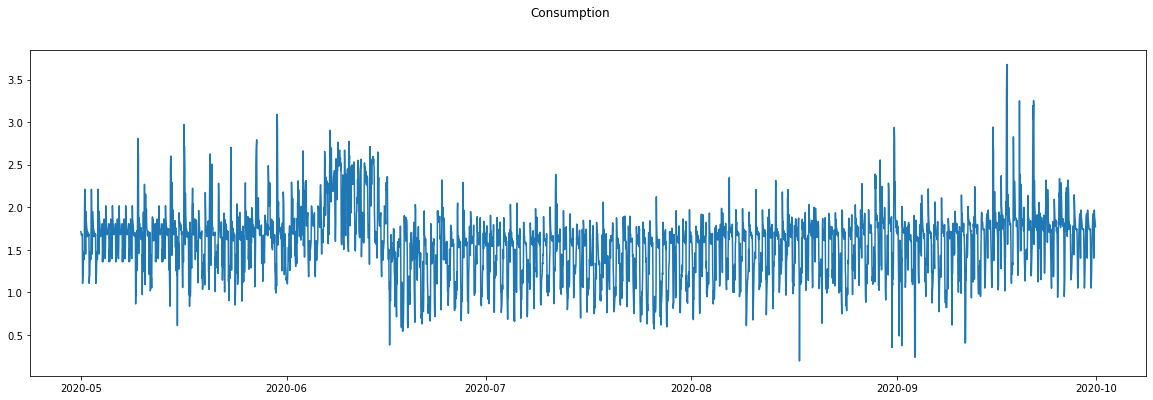

In [62]:
fig, axs = plt.subplots(1,1, figsize = (20, 6))
    
fig.suptitle('Consumption')

axs.plot(df_wrangled['consumption_kWh'])

In [63]:
#To CSV
df_wrangled.to_csv('01_Data\\01_Cleaned Data\\PumaRhodesville_hourly_id_47740_final.csv',index=None)

PermissionError: [Errno 13] Permission denied: '01_Data\\01_Cleaned Data\\PumaRhodesville_hourly_id_47740_final.csv'